In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import sys

# Adiciona o diretório raiz do projeto ao path para importar os módulos
module_path = os.path.abspath(os.path.join('..', '..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from trabalho_ic_aplicada.models.pca_np import PCA_np
from trabalho_ic_aplicada.dataset_faces import _imread_any, _to_gray, _resize_nn

2025-08-27 20:45:59.422 | INFO     | trabalho_ic_aplicada.config:<module>:11 - PROJ_ROOT path is: /home/apo-note/Documents/Github/Trabalhos_IC_Aplicada


### 1. Carregamento de Dados com Filtro de Iluminação

In [2]:
def build_filtered_dataset(root_dir, size, suffix_filter=".centerlight"):
    """Carrega apenas imagens que correspondem a um sufixo específico."""
    files = sorted([f for f in os.listdir(root_dir) if os.path.isfile(os.path.join(root_dir, f))])
    
    X_list = []
    
    for f in files:
        if f.endswith(suffix_filter):
            path = os.path.join(root_dir, f)
            try:
                img = _imread_any(path)
                g = _to_gray(img)
                g = _resize_nn(g, size)
                X_list.append(g.flatten())
            except Exception as e:
                print(f"Falha ao ler {path}: {e}")
                continue
                
    if not X_list:
        raise ValueError(f"Nenhuma imagem encontrada com o filtro '{suffix_filter}' em {root_dir}.")
        
    return np.vstack(X_list)

In [ ]:
DATA_ROOT = '../../data/raw/Kit_projeto_FACES'
IMG_SIZE = (40, 40)

try:
    X_filtered = build_filtered_dataset(DATA_ROOT, IMG_SIZE, suffix_filter=".centerlight")
    print(f"Dataset filtrado carregado com sucesso. Shape: {X_filtered.shape}")
except ValueError as e:
    print(e)

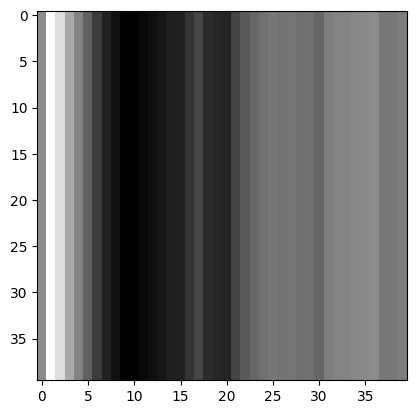

In [12]:
plt.imshow(X_filtered[0,:].reshape(IMG_SIZE), cmap='gray')

### 2. Cálculo e Visualização do PCA no Dataset Filtrado

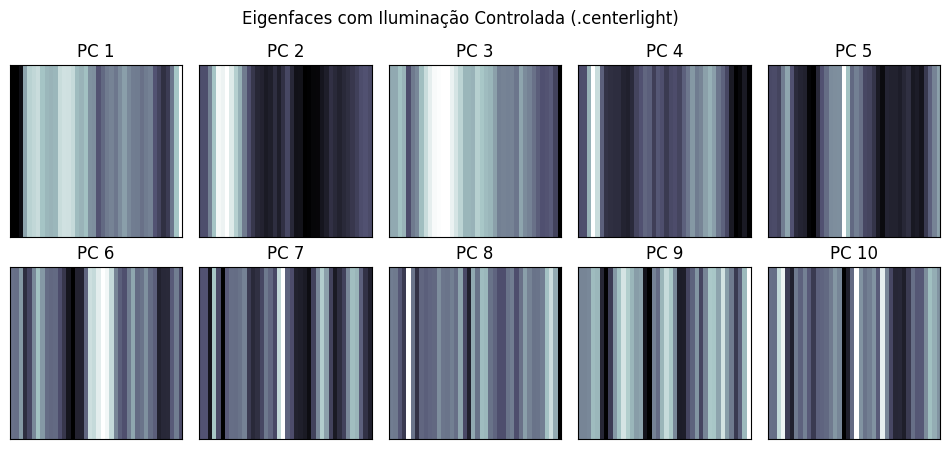

In [4]:
# Ajusta o PCA nos dados filtrados
pca_filtered = PCA_np()
pca_filtered.fit(X_filtered)

# Função de plotagem (a mesma da análise anterior)
def plot_eigenfaces(pca_model, h, w, title, n_eigenfaces=10):
    fig, axes = plt.subplots(2, 5, figsize=(12, 5),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        if i < n_eigenfaces:
            eigenface = pca_model.Vt_[i, :].reshape(h, w)
            ax.imshow(eigenface, cmap='bone')
            ax.set_title(f"PC {i+1}")
    plt.suptitle(title)
    plt.show()

plot_eigenfaces(pca_filtered, IMG_SIZE[0], IMG_SIZE[1], "Eigenfaces com Iluminação Controlada (.centerlight)" )

### Conclusão do Experimento

Como esperado, ao remover a variação de iluminação, as primeiras componentes principais agora capturam as características que diferenciam os rostos (formato da cabeça, olhos, nariz). As eigenfaces resultantes se parecem muito mais com 'rostos fantasmagóricos', que é a aparência canônica esperada. 

Isso confirma que o código de PCA está correto e que os resultados anteriores (listras) eram uma representação fiel da variância do dataset original, que era dominada pela iluminação.